# Real Estate Price Prediction

In [5]:
from __future__ import print_function
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,7)
import seaborn as sns

In [2]:
redf = pd.read_csv("real_estate_data.csv")

# Exploratory Data Analysis

In [3]:
redf.shape

(1883, 26)

In [4]:
redf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tx_price            1883 non-null   int64  
 1   beds                1883 non-null   int64  
 2   baths               1883 non-null   int64  
 3   sqft                1883 non-null   int64  
 4   year_built          1883 non-null   int64  
 5   lot_size            1883 non-null   int64  
 6   property_type       1883 non-null   object 
 7   exterior_walls      1660 non-null   object 
 8   roof                1529 non-null   object 
 9   basement            1657 non-null   float64
 10  restaurants         1883 non-null   int64  
 11  groceries           1883 non-null   int64  
 12  nightlife           1883 non-null   int64  
 13  cafes               1883 non-null   int64  
 14  shopping            1883 non-null   int64  
 15  arts_entertainment  1883 non-null   int64  
 16  beauty

In [6]:
redf.dtypes.value_counts()


int64      21
object      3
float64     2
dtype: int64

In [7]:
for i in redf.dtypes[redf.dtypes =='object'].index:
    print(i)

property_type
exterior_walls
roof


In [8]:
redf.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28,15,86,168,58,8.0,3,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28,36,88,176,61,7.0,3,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36,25,91,266,92,9.0,3,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36,49,77,188,65,6.0,3,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57,13,83,147,51,6.0,3,2007


In [9]:
redf.tail(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1873,569000,5,5,7165,1991,43995,Single-Family,Brick,Wood Shake/ Shingles,1.0,9,1,1,1,11,1,3,6,49,82,68,1024,312,8.0,2,1994
1874,370000,5,5,7578,2008,87120,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,0,0,0,0,1,0,0,2,47,92,84,1045,318,9.0,3,2004
1875,235000,5,5,7594,2006,36154,Single-Family,Brick,Composition Shingle,1.0,8,1,0,1,5,4,5,2,52,85,57,1061,323,5.5,2,2006
1876,760000,5,5,7842,2003,436035,Single-Family,Combination,NaN,1.0,0,0,0,0,0,0,0,0,48,76,62,881,249,7.5,2,2008
1877,555000,5,5,8450,2004,91911,Single-Family,Other,Composition Shingle,1.0,7,2,1,1,4,0,3,3,35,91,85,1966,599,10.0,3,2003
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46,76,87,1250,381,10.0,3,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42,73,61,1553,473,9.0,3,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43,87,66,942,287,8.0,1,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43,61,51,803,245,5.0,2,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37,80,86,1459,444,9.0,3,2015


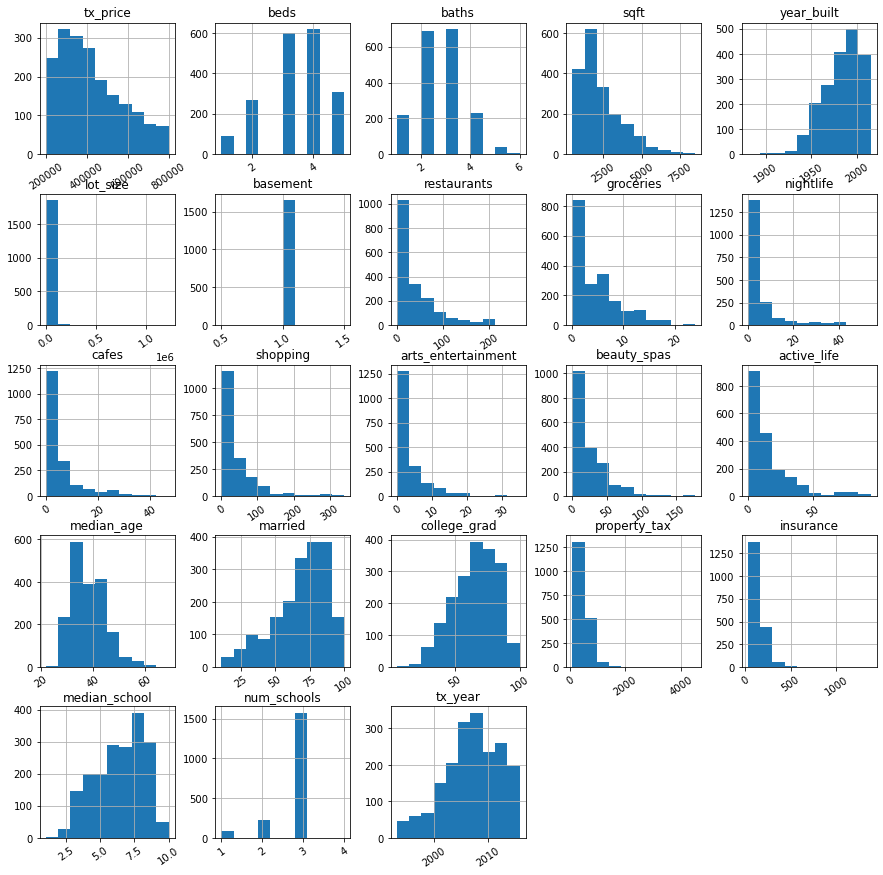

In [10]:
redf.hist(figsize=(15,15),xrot=35,grid=True)
plt.show()

In [11]:
redf.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [12]:
redf.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


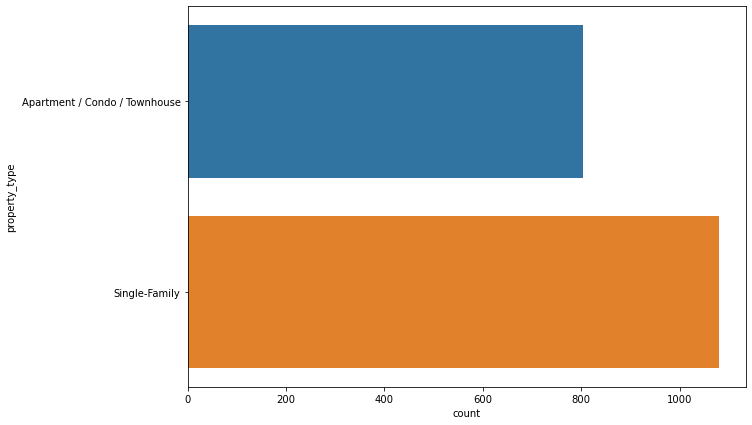

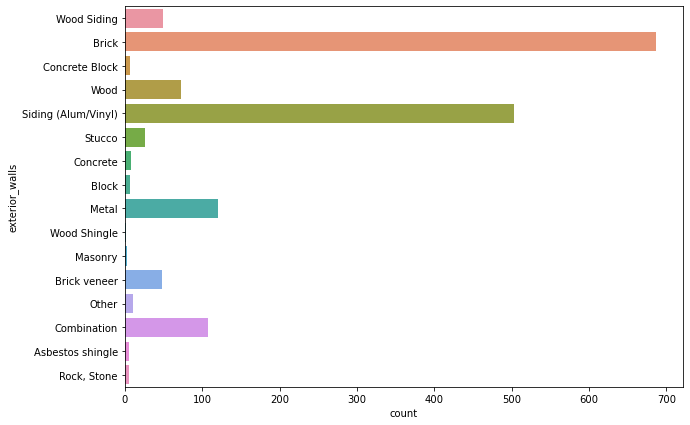

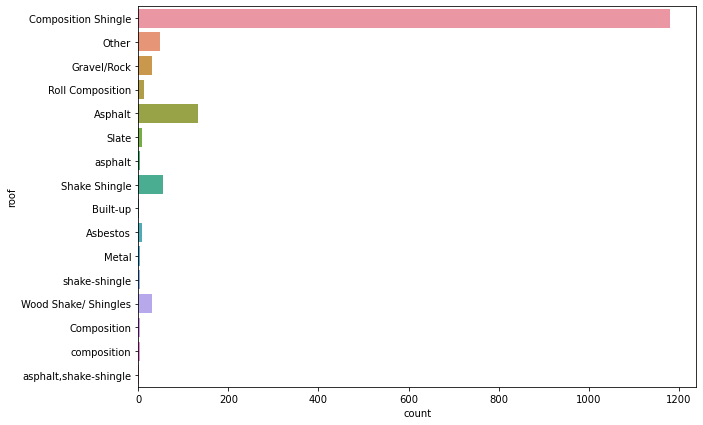

In [13]:
for i in redf.dtypes[redf.dtypes == 'object'].index:
    sns.countplot(y=i , data=redf)
    plt.show()

<AxesSubplot:xlabel='tx_price', ylabel='property_type'>

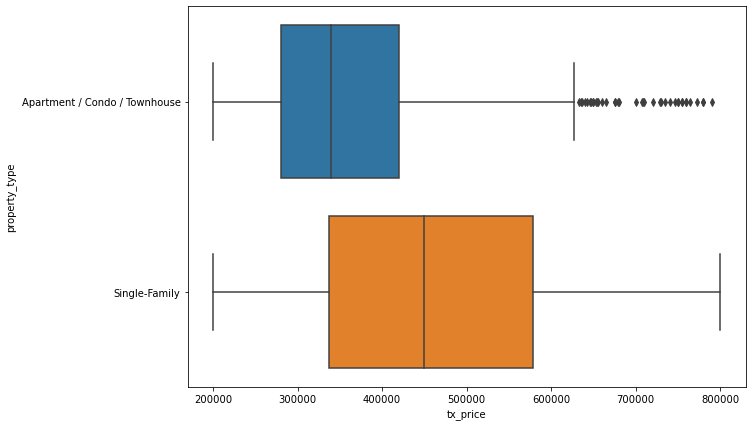

In [14]:
sns.boxplot(data=redf,x='tx_price',y='property_type')

<AxesSubplot:xlabel='sqft', ylabel='property_type'>

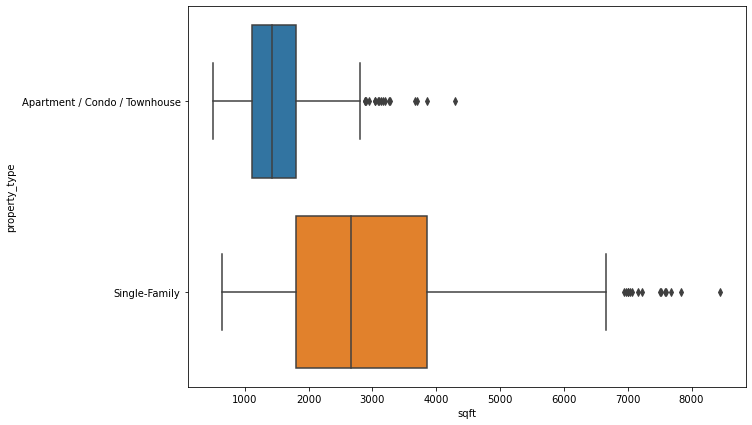

In [15]:
sns.boxplot(data=redf,x='sqft',y='property_type')

In [16]:
redf.groupby('property_type').agg([np.mean,np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

it appears that single family houses have bigger size than apartments.
the average price of apartment/condo is lesser than single family houses.
the variance of price and variance of size in sqft is higher in single-family houses.

In [17]:
correlation = redf.corr()

In [18]:
correlation

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


<AxesSubplot:>

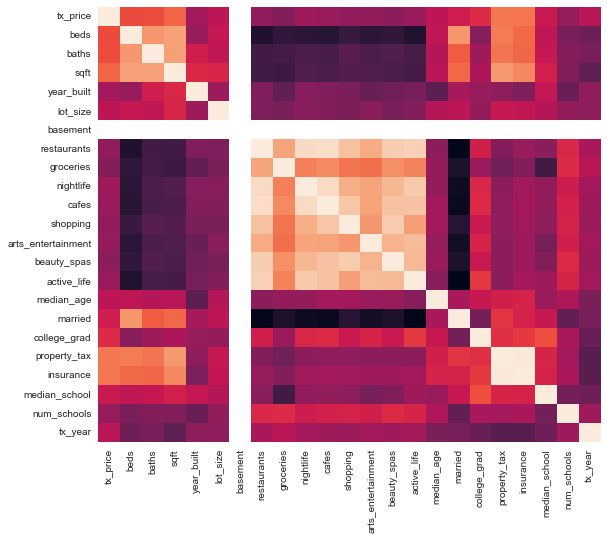

In [19]:
plt.figure(figsize=(9,8))
sns.set_style('white')
sns.heatmap(correlation,cbar=False)

# Data Cleaning

In [20]:
redf = redf.drop_duplicates()

In [21]:
redf.shape

(1883, 26)

In [22]:
redf['basement'].unique()

array([nan,  1.])

In [23]:
redf['basement'] = redf['basement'].fillna(0)

In [24]:
redf['basement'].unique()

array([0., 1.])

<AxesSubplot:xlabel='count', ylabel='roof'>

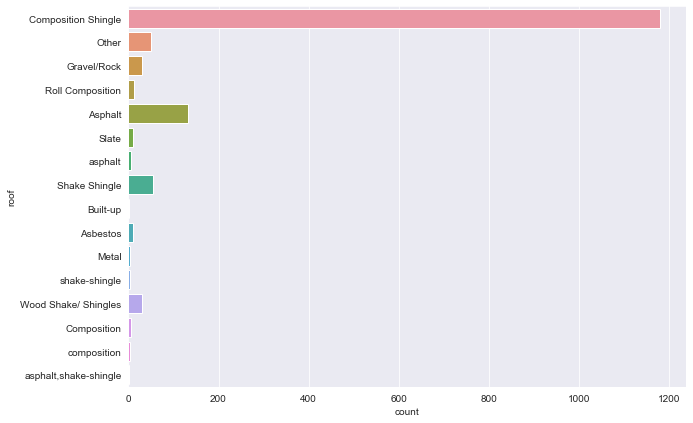

In [25]:
sns.set_style('darkgrid')
sns.countplot(y='roof',data=redf)

In [26]:
redf['roof'].replace('composition','Composition',inplace=True)

In [27]:
redf['roof'].replace('asphalt','Asphalt',inplace=True)
redf['roof'].replace(['shake-shingle','asphalt,shake-shingle'],'Shake Shingle',inplace=True)

<AxesSubplot:xlabel='count', ylabel='roof'>

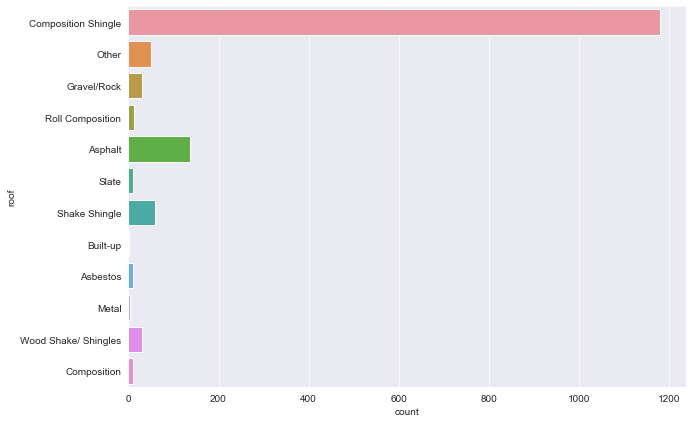

In [28]:
sns.countplot(y='roof',data=redf)

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

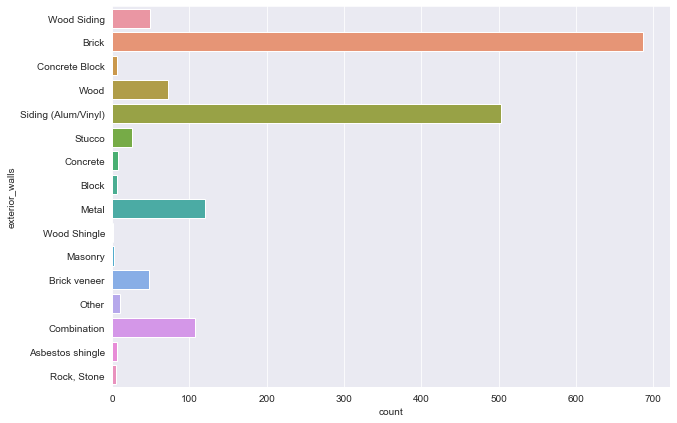

In [29]:
sns.countplot(y='exterior_walls',data=redf)

In [30]:
redf['exterior_walls'].replace('Rock,Stone','Masonry',inplace=True)
redf['exterior_walls'].replace(['Concrete','Block'],'Concrete Block',inplace=True)

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

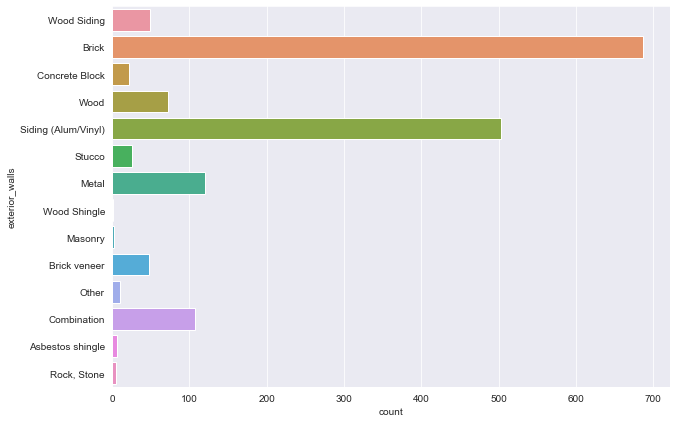

In [31]:
sns.countplot(y='exterior_walls',data=redf)

# Removing Outlier

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


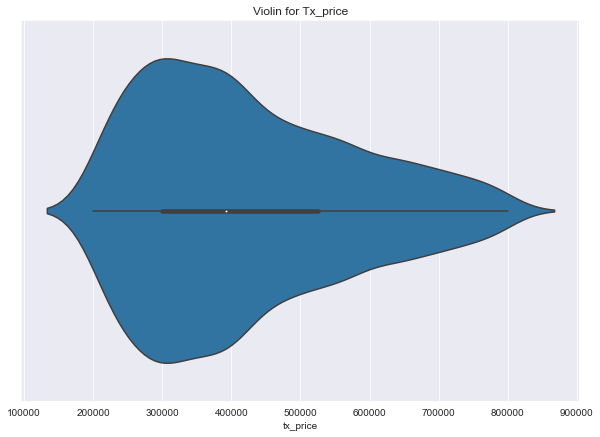

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


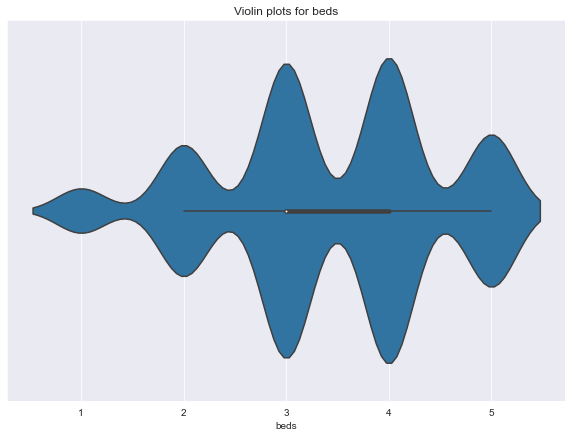

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


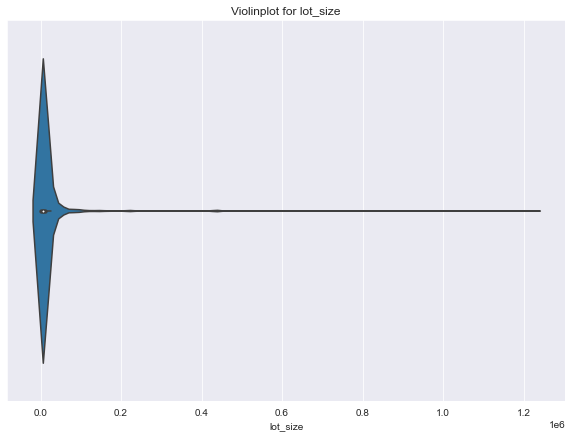

In [32]:
sns.violinplot(redf['tx_price'])
plt.title('Violin for Tx_price')
plt.show()

sns.violinplot(redf['beds'])
plt.title('Violin plots for beds')
plt.show()

sns.violinplot(redf['lot_size'])
plt.title('Violinplot for lot_size')
plt.show()

In [33]:
redf['lot_size'].sort_values(ascending=False)[:5]

102     1220551
1111     436471
1832     436035
1876     436035
1839     435600
Name: lot_size, dtype: int64

In [34]:
redf = redf[redf['lot_size'] <500000]
print(len(redf))

1882


In [35]:
#counting the missing values in data
redf.select_dtypes(include = ['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [36]:
for i in redf.select_dtypes(include =['object']):
    redf[i].fillna('Missing',inplace=True)

In [37]:
redf.select_dtypes(include = ['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [38]:
redf.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [39]:
redf.to_csv('cleaned_df.csv',index=None)

# Feature Engineering

In [40]:
df = pd.read_csv('cleaned_df.csv')

In [41]:
df['two_and_two'] = ((df['beds']==2) & (df['baths']==2)).astype(int)

In [42]:
df.two_and_two.mean()

0.09458023379383634

In [43]:
#Now creating 'property_age' feature for the age of the property at the time of the transaction.
df['property_age'] = df['tx_year'] - df['year_built']

In [44]:
min(df['property_age'])

-8

In [45]:
sum(df['property_age']<0)

19

In [46]:
df = df[df['property_age'] >=0]
print(len(df))

1863


In [47]:
# create a school score feature the num_schools * mean_schools
df['school_score'] = df['num_schools'] * df['median_school']

In [48]:
np.median(df['school_score'])

18.0

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

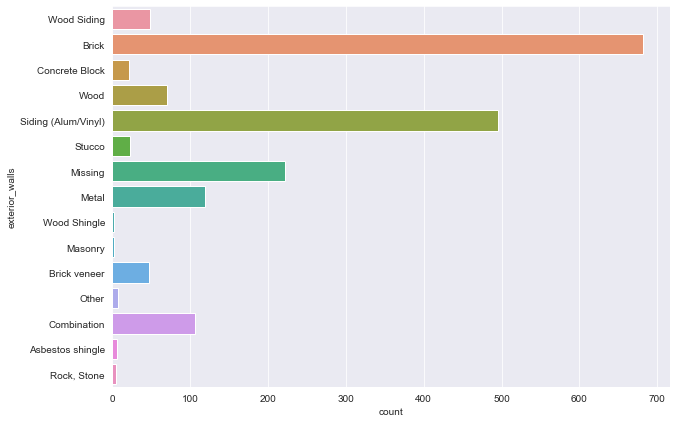

In [49]:
sns.countplot(data =df,y='exterior_walls')

In [50]:
df['exterior_walls'].replace(['Wood Siding','Wood Shingle'],'Wood',inplace=True)

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

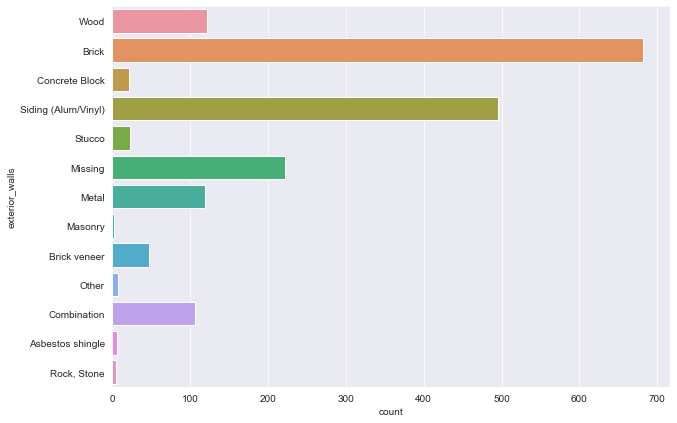

In [51]:
sns.countplot(data=df,y = 'exterior_walls')

In [55]:
other_exterior_walls = ['Stucco','Other','Asbestos shingle','Concrete Block',
                       'Masonry','Other']
df['exterior_walls'].replace(other_exterior_walls,'Other',inplace=True)

<AxesSubplot:xlabel='count', ylabel='exterior_walls'>

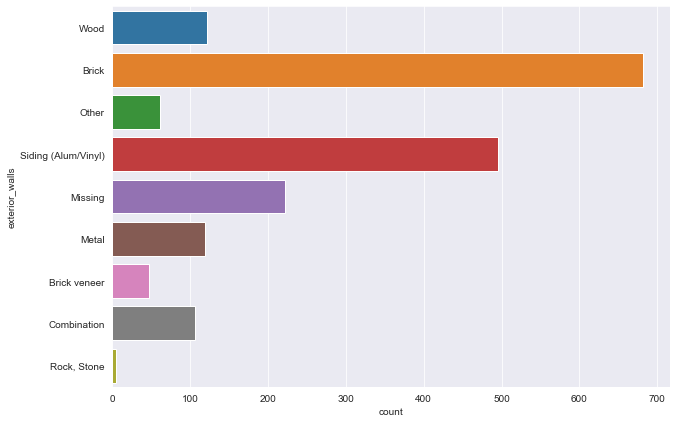

In [56]:
sns.countplot(data=df, y='exterior_walls')

<AxesSubplot:xlabel='count', ylabel='roof'>

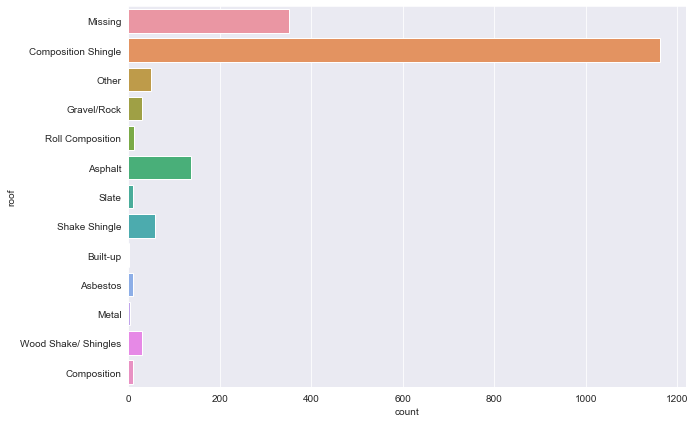

In [57]:
sns.countplot(data=df,y='roof')

In [58]:
df['roof'].replace(['Composition','Wood Shake/ Shingles'],'Composition Shingle',inplace=True)

In [59]:
other_group = ['Other','Gravel/Rock','Roll Composition','Slate','Built-up','Asbestos','Metal']
df['roof'].replace(other_group,'Other',inplace= True)

<AxesSubplot:xlabel='count', ylabel='roof'>

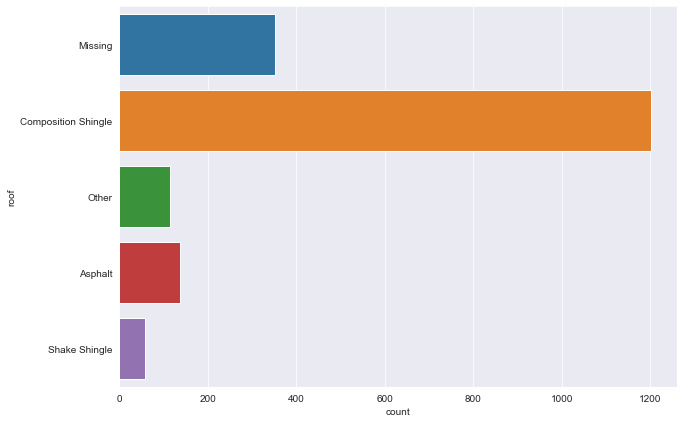

In [60]:
sns.countplot(data =df,y='roof')

In [61]:
df = pd.get_dummies(df,columns=['exterior_walls','roof','property_type'])

In [62]:
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,"exterior_walls_Rock, Stone",exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,2013,0,0,27.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,2006,0,41,9.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,2012,0,49,24.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,2005,0,5,27.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,2002,0,10,27.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,265000,1,1,641,1947,0,0.0,146,10,23,27,86,9,60,52,28,15,86,168,58,8.0,3,2004,0,57,24.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,240000,1,1,642,1944,0,0.0,159,13,36,17,92,12,66,50,28,36,88,176,61,7.0,3,2011,0,67,21.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
7,388100,1,1,650,2000,33541,0.0,198,9,38,25,127,11,72,83,36,25,91,266,92,9.0,3,2005,0,5,27.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
8,240000,1,1,660,1983,0,0.0,51,8,6,2,40,18,32,41,36,49,77,188,65,6.0,3,2013,0,30,18.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9,250000,1,1,664,1965,0,0.0,119,10,26,25,183,13,70,36,57,13,83,147,51,6.0,3,2007,0,42,18.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [63]:
df = df.drop(['tx_year','year_built'],axis=1)

In [64]:
df.to_csv('analytical_base_table.csv',index=None)

# Model Training

In [65]:
import sklearn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [14]:
df = pd.read_csv('analytical_base_table.csv')

In [15]:
print(df.shape)

(1863, 40)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = df['tx_price']

X = df.drop('tx_price',axis=1)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1234)

In [19]:
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,"exterior_walls_Rock, Stone",exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,3.434228,2.579195,2322.785235,12746.659732,0.878523,39.495973,4.388591,5.004698,5.185906,39.561074,3.361745,22.909396,15.770470,38.508725,69.471141,65.012752,464.265772,139.610067,6.510067,2.779195,0.092617,24.343624,17.940268,0.359732,0.024161,0.059060,0.065772,0.119463,0.034228,0.003356,0.268456,0.065772,0.073154,0.643624,0.189262,0.060403,0.033557,0.419463,0.580537
std,1.072914,0.930476,1297.101677,34805.545024,0.326790,46.985862,4.498340,8.441995,7.442707,52.334853,4.693709,25.724463,17.999282,6.615223,19.865080,17.092542,227.249819,71.510905,1.975224,0.517235,0.289993,21.209025,6.452059,0.480083,0.153601,0.235817,0.247966,0.324442,0.181876,0.057851,0.443305,0.247966,0.260477,0.479089,0.391848,0.238311,0.180146,0.493637,0.493637
min,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1351.000000,1542.000000,1.000000,6.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,59.000000,53.250000,321.000000,94.000000,5.000000,3.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1913.500000,6183.000000,1.000000,21.000000,3.000000,2.000000,3.000000,20.000000,2.000000,15.000000,10.000000,38.000000,74.000000,66.000000,426.000000,125.000000,7.000000,3.000000,0.000000,20.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,3014.750000,11761.000000,1.000000,56.000000,7.000000,6.000000,6.000000,50.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,572.000000,169.000000,8.000000,3.000000,0.000000,38.000000,24.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,6.000000,7842.000000,436471.000000,1.000000,266.000000,24.000000,53.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,1.000000,114.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)
linreg_mse = mean_squared_error(y_test, linreg_pred)
print("Linear Regression MSE:", linreg_mse)
r2 = r2_score(y_test, linreg_pred)

print("R2 score:", r2)

Linear Regression MSE: 12099569888.522308
R2 score: 0.40620542537661697


In [22]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print("Decision Tree Regression MSE:", tree_mse)
r2 = r2_score(y_test, tree_pred)

print("R2 score:", r2)

Decision Tree Regression MSE: 19805562303.94638
R2 score: 0.028028636405932228


In [23]:
forest = RandomForestRegressor(n_estimators=1000)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
print("Random Forest Regression MSE:", forest_mse)
r2 = r2_score(y_test, forest_pred)

print("R2 score:", r2)

Random Forest Regression MSE: 8970210923.45513
R2 score: 0.5597808328188787


In [24]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = svr.predict(X_test)

# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: {:.2f}'.format(mse))
r2 = r2_score(y_test, y_pred)

print("R2 score:", r2)

Mean squared error: 19760302985.78
R2 score: 0.030249768051777037


## Making Predictions

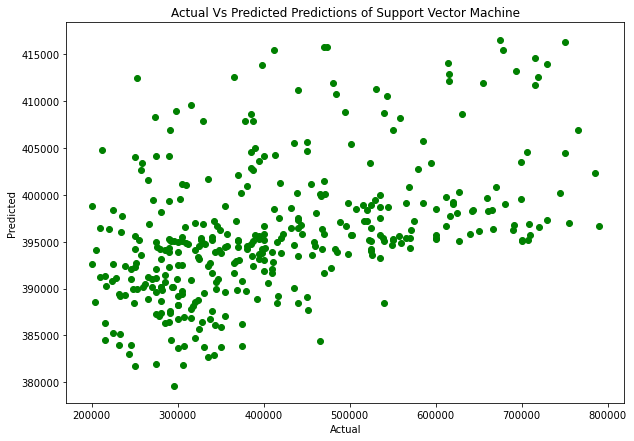

In [38]:
plt.scatter(y_test, y_pred, c='green')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title('Actual Vs Predicted Predictions of Support Vector Machine')
plt.show()

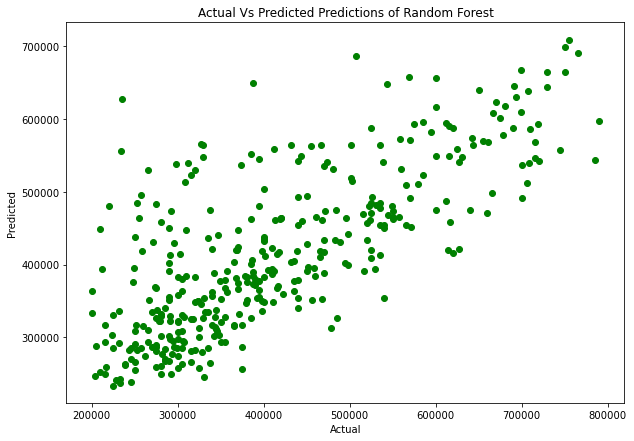

In [37]:
plt.scatter(y_test, forest_pred, c='green')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title('Actual Vs Predicted Predictions of Random Forest')
plt.show()

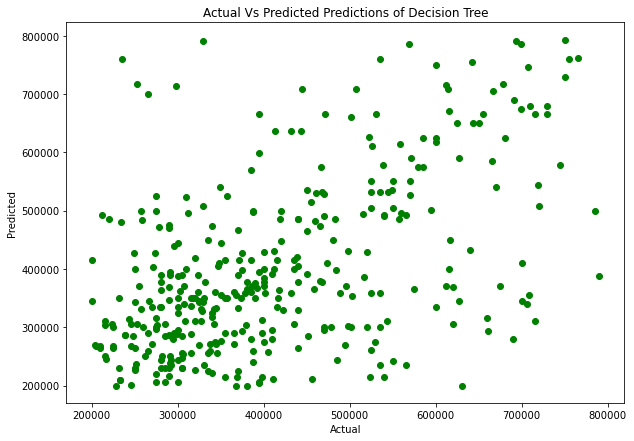

In [39]:
plt.scatter(y_test, tree_pred, c='green')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title('Actual Vs Predicted Predictions of Decision Tree')
plt.show()

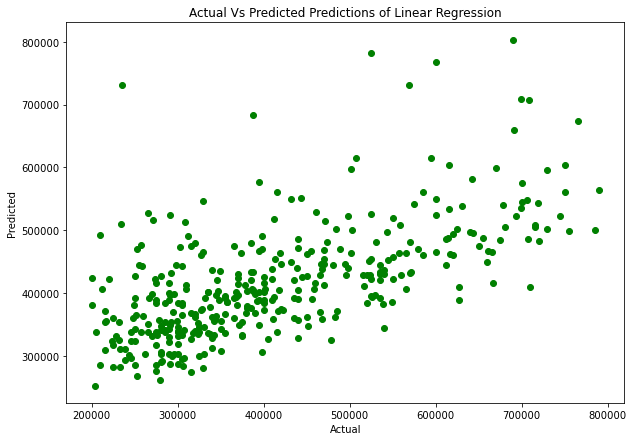

In [40]:
linreg_pred
plt.scatter(y_test, linreg_pred, c='green')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.title('Actual Vs Predicted Predictions of Linear Regression')
plt.show()

In [29]:
svr_prediction = svr.predict([[5,3,4082,7405,1.0,7,2,1,1,5,0,3,4,39,81,74,601,155,6.0,3,0,11,18.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1]])

In [30]:
svr_prediction

array([395033.04038027])

In [31]:
linreg_prediction = linreg.predict([[5,3,4082,7405,1.0,7,2,1,1,5,0,3,4,39,81,74,601,155,6.0,3,0,11,18.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1]])

In [32]:
linreg_prediction

array([-1.28173618e+17])

In [33]:
tree_prediction = tree.predict([[5,3,4082,7405,1.0,7,2,1,1,5,0,3,4,39,81,74,601,155,6.0,3,0,11,18.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1]])

In [34]:
tree_prediction

array([279875.])

In [35]:
forest_prediction = forest.predict([[5,3,4082,7405,1.0,7,2,1,1,5,0,3,4,39,81,74,601,155,6.0,3,0,11,18.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1]])

In [36]:
forest_prediction

array([537872.953])